In [1]:
import utils
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from joblib import dump,load
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
def read_data(filename):
    f = pd.read_csv(filename)


    d = f.loc[:, 'Solvent':'catalyst'] 
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(d)
    encoded = encoder.transform(d).toarray()
    print(encoded[0])


    del f['Solvent']
    del f['catalyst']

    
    new_feature_names = [
        'Deionized_Water', 'Ethanol', 'Ethylene_glycol', 'Methanol', 'Acetic_Acid', 
        'Ethylenediamine', 'Hydrogen_Peroxide', 'NONE']
    for i in range(encoded.shape[1]):
        f.insert(5 + i, new_feature_names[i], encoded[:, i])

    print(f)
    f.dropna(inplace=True)

    X = f.loc[:, 'Time/h':'catalystamount/mg']
    xnames = X.columns
    Y = f['INT']

    print("'processed_features.csv' and 'processed_target.csv'")
    print(X.shape)
    print(Y.shape)

    return X, Y, xnames


X, Y, xnames = read_data('C:/Users/Hu/work1/step1/HWW.csv')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=10)
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
print("X_test's shape is", X_test.shape,"; y_test's shape is",y_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train) 
X_test_stand = scaler.transform(X_test) 

[1. 0. 0. 0. 1. 0. 0. 0.]
    Time/h  Tem/℃  PG/mg  OPD/mg  Solventamount/ml  Deionized_Water  Ethanol  \
0        8    180   6.25    6.25                25              1.0      0.0   
1        8    180   6.25    6.25                25              0.0      1.0   
2        8    180   0.00    6.25                25              0.0      1.0   
3       12    200   0.20    5.00                25              0.0      1.0   
4       12    200   0.00    5.00                25              0.0      1.0   
..     ...    ...    ...     ...               ...              ...      ...   
73       4    180   0.00   15.00                25              1.0      0.0   
74       4    120   0.00   15.00                25              1.0      0.0   
75       8    120   0.00   20.00                50              0.0      1.0   
76       8    120   0.00   15.00                50              0.0      1.0   
77       8    120   0.00   10.00                50              0.0      1.0   

    Ethylene_

In [3]:
best_model = xgb.sklearn.XGBRegressor(
    learning_rate=0.35,
    n_estimators=500,
    max_depth=3,
    min_child_weight=6,
)

best_model.fit(X_train_stand, y_train)


y_train_hat = best_model.predict(X_train_stand)
y_test_hat = best_model.predict(X_test_stand)


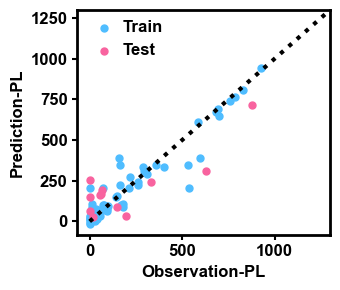

In [4]:
fontsize = 12


plt.figure(figsize=(3.5, 3))


plt.style.use('default')


plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.weight'] = 'bold'  

plt.tick_params(axis='both', which='major', width=1.5)  

a = plt.scatter(y_train, y_train_hat, s=25, c='#4FBDFF')


plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=3)  


plt.xlabel('Observation-PL', fontsize=fontsize, fontweight='bold') 
plt.ylabel('Prediction-PL', fontsize=fontsize, fontweight='bold')  



b = plt.scatter(y_test, y_test_hat, s=25, c='#F8639F')


plt.xlim(right=1300)


plt.ylim(top=1300)


plt.legend((a, b), ('Train', 'Test'), fontsize=fontsize, handletextpad=0.1, borderpad=0.1, frameon=False, loc='best')

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  


plt.tight_layout()


plt.savefig('XGboost.png', dpi=300, bbox_inches='tight')


plt.show()
